In [1]:
# Data manipulation, visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
!pip install openpyxl
!pip install imblearn
!pip install delayed
# Preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [2]:
demo= pd.read_excel('Telco_customer_churn_demographics.xlsx')
loc= pd.read_excel('Telco_customer_churn_location.xlsx')
serv= pd.read_excel('Telco_customer_churn_services.xlsx')
stat= pd.read_excel('Telco_customer_churn_status.xlsx')

In [3]:
key = ['Customer ID']
df = stat.merge(  # Merge into a single dataframe
    demo, left_on=key, right_on=key).merge(
    serv, left_on=key, right_on=key).merge(
    loc, left_on=key, right_on=key)
df.head()

,Customer ID,Count_x,Quarter_x,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,...,Total Long Distance Charges,Total Revenue,Count_y,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,...,0.00,59.65,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,...,390.80,1024.10,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,...,203.94,1910.88,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,...,494.00,2995.07,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,...,234.21,3102.36,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [4]:
df.columns

Index(['Customer ID', 'Count_x', 'Quarter_x', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason', 'Count_y', 'Gender', 'Age',
       'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Count_x', 'Quarter_y', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Count_y', 'Country', 'State', 'City', 'Zip Code',
      

In [5]:
to_drop = [  # Drop columns not used in the analyses
    'Customer ID',
   
    'Quarter_x',
    'Customer Status',
    'Churn Value',
    'Churn Score',
    'Churn Category',
    'Count_y',
    'Age',
    'Number of Dependents',
    'Quarter_y',
    'Referred a Friend',
    'Number of Referrals',
    'Phone Service',
    
    'Streaming Music',
    'Total Charges',
    'Total Refunds',
    
    'Total Revenue']
df.drop(to_drop, axis=1, inplace=True)

In [6]:
df1=df

In [7]:
df1.rename(columns={"Count_x": "Count"},inplace =True)


In [8]:
df1.head()

,Count,Satisfaction Score,Churn Label,CLTV,Churn Reason,Gender,Under 30,Senior Citizen,Married,Dependents,...,Monthly Charge,Total Extra Data Charges,Total Long Distance Charges,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,1,3,Yes,5433,Competitor offered more data,Male,No,Yes,No,No,...,39.65,20,0.00,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,1,3,Yes,5302,Competitor made better offer,Female,No,Yes,Yes,Yes,...,80.65,0,390.80,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1,2,Yes,3179,Competitor made better offer,Male,No,Yes,No,Yes,...,95.45,0,203.94,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,1,2,Yes,5337,Limited range of services,Female,No,Yes,Yes,Yes,...,98.50,0,494.00,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,1,2,Yes,2793,Extra data charges,Female,No,Yes,Yes,Yes,...,76.50,0,234.21,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [9]:
df1 = df1.T.drop_duplicates().T

In [10]:
df1.dtypes

Count                                object
Satisfaction Score                   object
Churn Label                          object
CLTV                                 object
Churn Reason                         object
Gender                               object
Under 30                             object
Senior Citizen                       object
Married                              object
Dependents                           object
Tenure in Months                     object
Offer                                object
Avg Monthly Long Distance Charges    object
Multiple Lines                       object
Internet Service                     object
Internet Type                        object
Avg Monthly GB Download              object
Online Security                      object
Online Backup                        object
Device Protection Plan               object
Premium Tech Support                 object
Streaming TV                         object
Streaming Movies                

In [56]:
df1.isna().sum()# Check for missing values

Count                                   0
Satisfaction Score                      0
Churn Label                             0
CLTV                                    0
Churn Reason                         5174
Gender                                  0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Tenure in Months                        0
Offer                                   0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Unlimited Data                    

In [57]:
df2=df.fillna(0)

In [58]:
df2.isna().sum()

Count                                0
Satisfaction Score                   0
Churn Label                          0
CLTV                                 0
Churn Reason                         0
Gender                               0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Count                                0
Tenure in Months                     0
Offer                                0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Unlimited Data                       0
Contract                 

In [59]:
df2['Churn Reason'].unique()

array(['Competitor offered more data', 'Competitor made better offer',
       'Limited range of services', 'Extra data charges',
       'Competitor had better devices', "Don't know",
       'Service dissatisfaction',
       'Lack of affordable download/upload speed',
       'Product dissatisfaction', 'Long distance charges',
       'Poor expertise of online support', 'Attitude of support person',
       'Network reliability', 'Competitor offered higher download speeds',
       'Moved', 'Price too high', 'Attitude of service provider',
       'Poor expertise of phone support', 'Deceased', 0,
       'Lack of self-service on Website'], dtype=object)

In [60]:

print('PROPORTION OF CATEGORIES ACROSS VARIABLES')

freq = df2['Churn Reason'].value_counts(normalize=True).reset_index()

print('-'*40+'\n', freq)

PROPORTION OF CATEGORIES ACROSS VARIABLES
----------------------------------------
                                         index  Churn Reason
0                                           0      0.734630
1               Competitor had better devices      0.044441
2                Competitor made better offer      0.044157
3                  Attitude of support person      0.031237
4                                  Don't know      0.018458
5                Competitor offered more data      0.016612
6   Competitor offered higher download speeds      0.014198
7                Attitude of service provider      0.013347
8                              Price too high      0.011075
9                     Product dissatisfaction      0.010933
10                        Network reliability      0.010223
11                      Long distance charges      0.009087
12                    Service dissatisfaction      0.008945
13                                      Moved      0.006531
14              

In [61]:

df3 =df2[df2['Churn Reason'] !=0]
df3

,Count,Satisfaction Score,Churn Label,CLTV,Churn Reason,Gender,Under 30,Senior Citizen,Married,Dependents,...,Monthly Charge,Total Extra Data Charges,Total Long Distance Charges,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,1,3,Yes,5433,Competitor offered more data,Male,No,Yes,No,No,...,39.65,20,0.00,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,1,3,Yes,5302,Competitor made better offer,Female,No,Yes,Yes,Yes,...,80.65,0,390.80,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1,2,Yes,3179,Competitor made better offer,Male,No,Yes,No,Yes,...,95.45,0,203.94,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,1,2,Yes,5337,Limited range of services,Female,No,Yes,Yes,Yes,...,98.50,0,494.00,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,1,2,Yes,2793,Extra data charges,Female,No,Yes,Yes,Yes,...,76.50,0,234.21,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,1,1,Yes,5730,Competitor had better devices,Female,Yes,No,No,No,...,60.40,0,72.12,United States,California,Imperial,92251,"32.858595, -115.662709",32.858595,-115.662709
2531,1,1,Yes,3463,Competitor had better devices,Male,No,No,Yes,Yes,...,70.65,0,37.68,United States,California,Ocotillo,92259,"32.698964, -115.886656",32.698964,-115.886656
2532,1,3,Yes,4581,Competitor offered higher download speeds,Male,No,No,No,No,...,59.80,0,115.20,United States,California,Palm Springs,92264,"33.745746, -116.514215",33.745746,-116.514215
2533,1,2,Yes,2029,Competitor offered higher download speeds,Female,No,No,No,No,...,44.20,0,377.28,United States,California,Seeley,92273,"32.790282, -115.689559",32.790282,-115.689559


Text(0.5, 0, 'Number of Customer Churn')

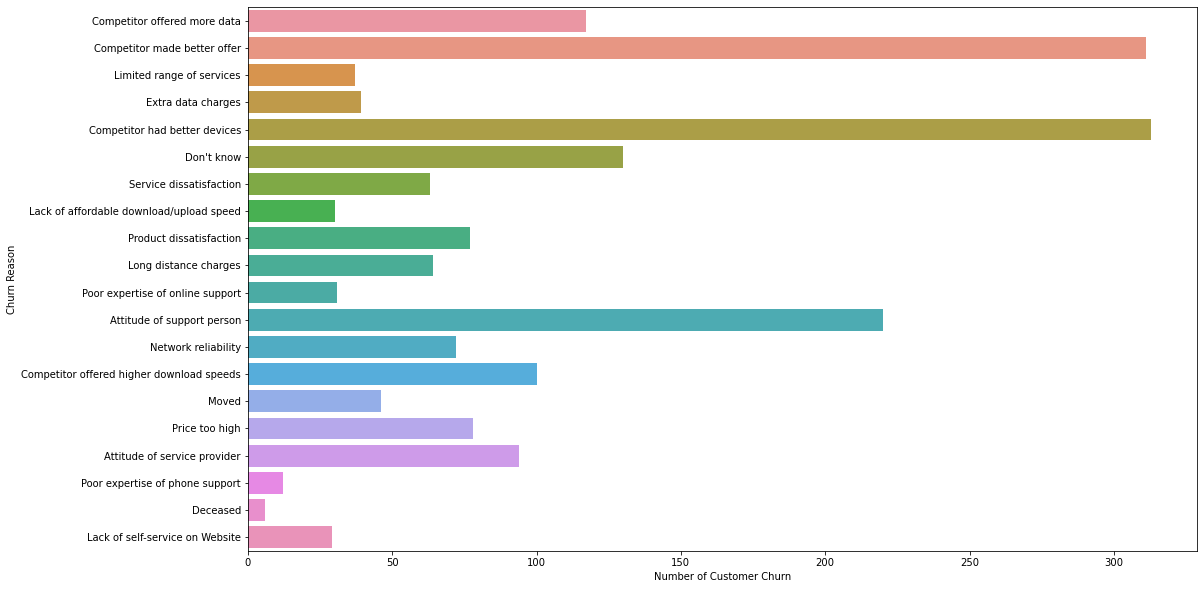

In [17]:
cpal = {'No':'#0C1E5F', 'Yes':'#ABD3FE'}
total = len(df3['Churn Reason'])*55.
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.countplot(y="Churn Reason", data=df3)
#plt.title('Distribution of  Configurations')
plt.xlabel('Number of Customer Churn')



In [62]:
def unstack_bar(img_title, df, col):
    fig, ax = plt.subplots(figsize=(6,5))
    ax = sns.countplot(data=df, x=col, hue='Churn Label', palette=cpal)
    ax.legend(loc='lower center', ncol=2,
              bbox_to_anchor=(0.5, -0.21),
              labels=['Churn = Yes', 'Churn = No'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(None)
    ax.set_ylabel('Count')
    ax.set_title(f'{col}', loc='left', weight='bold')
    fig.savefig(f'{img_title}.png', dpi=300, bbox_inches='tight')

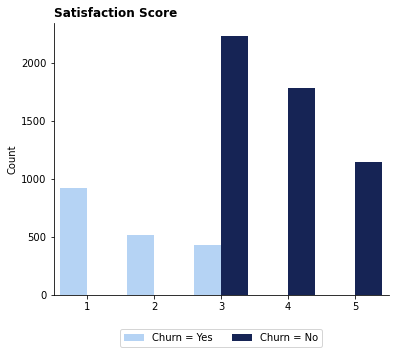

In [63]:
unstack_bar('Satisfaction Score', df, 'Satisfaction Score')

In [64]:
def stack_bar(img_title, df, cols):
    fig, axes = plt.subplots(1, 3, figsize=(16,5), sharey=True)
    for i, col in enumerate(cols):
        # Calculate totals and percentages
        total = df.groupby(col)['Count'].sum().reset_index()
        churn = df[df['Churn Label']=='Yes'].groupby(col)['Count'].sum().reset_index()
        churn['Count'] = [100*i/j for i,j in zip(churn['Count'], total['Count'])]
        total['Count'] = [100*i/j for i,j in zip(total['Count'], total['Count'])]
        bar1 = sns.barplot(  # top bars (group of 'Churn = No')
            x=col, y='Count', data=total, color=cpal['No'], ax=axes[i])
        bar2 = sns.barplot(  # bottom bars (group of 'Churn = Yes')
            x=col, y='Count', data=churn, color=cpal['Yes'], ax=axes[i])
        top_bar = mpatches.Patch(color=cpal['No'], label='Not Churn')
        bot_bar = mpatches.Patch(color=cpal['Yes'], label='Churn')  
        axes[i].legend(loc='lower center', ncol=2,
                       bbox_to_anchor=(0.5, -0.21),
                       handles=[top_bar, bot_bar])
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('Percentage')
        axes[i].set_title(f'{col}', loc='left', weight='bold')  
        if i != 0:
            axes[i].legend().set_visible(False)
            axes[i].set_ylabel(None)
        else:
            pass
        for bar in axes[i].patches:
            if bar.get_height() != 100:
                axes[i].text(bar.get_x() + bar.get_width()/2,
                             bar.get_y() + bar.get_height()/2,
                             f'{int(bar.get_height())}%',
                             ha='center', va='center',
                             color='white', weight='bold')
    fig.savefig(f'{img_title}.png', dpi=300, bbox_inches='tight')

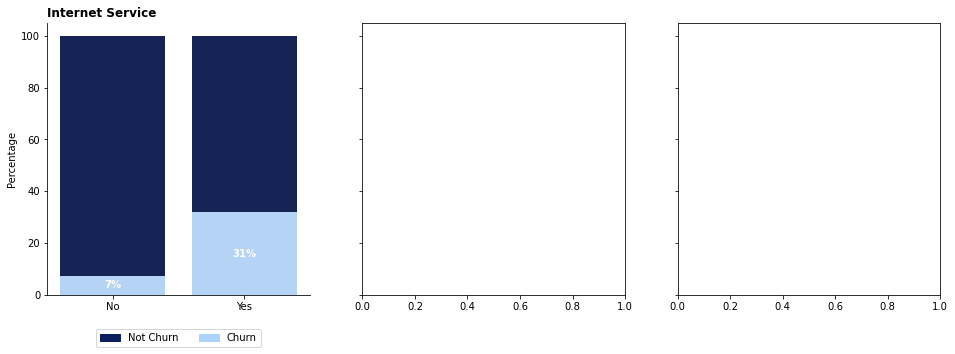

In [68]:
stack_bar('img-02', df1, ['Internet Service']);
#Streaming TV                Streaming Movies           Streaming Music

No handles with labels found to put in legend.


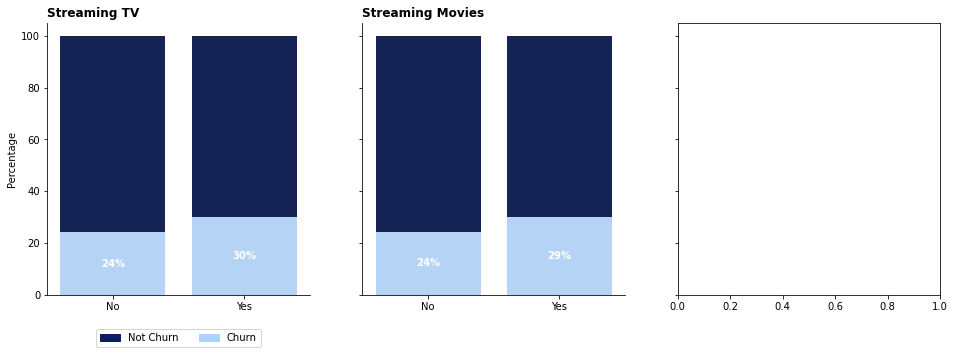

In [69]:
stack_bar('img-03', df1, ['Streaming TV','Streaming Movies']);

Text(0.5, 0, 'Number of Customer Churn')

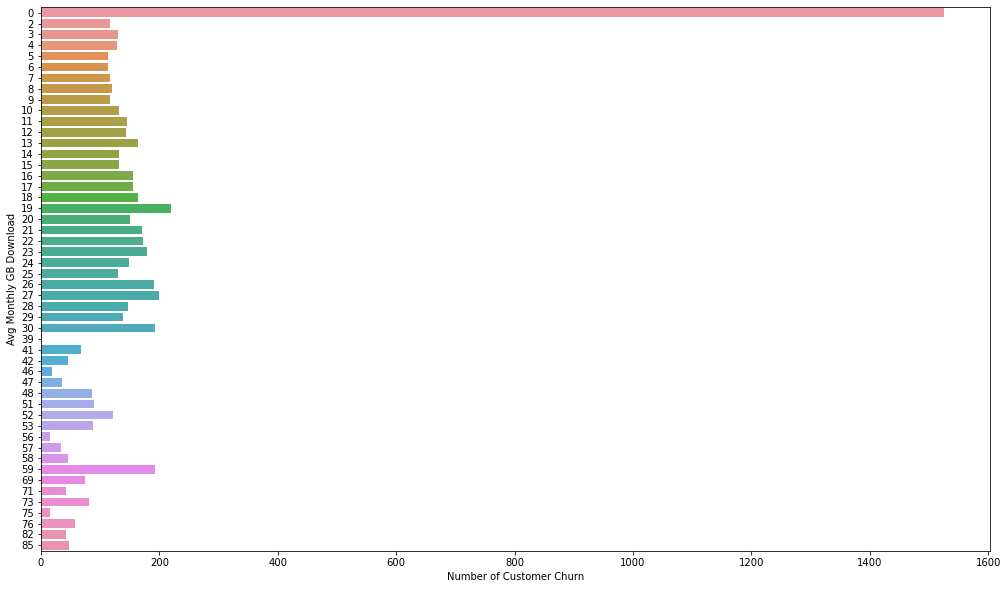

In [70]:
total = len(df2['Avg Monthly GB Download'])*55.
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.countplot(y="Avg Monthly GB Download", data=df2)
#plt.title('Distribution of  Configurations')
plt.xlabel('Number of Customer Churn')



In [71]:

df2.groupby(['Unlimited Data'])['Churn Label'].count()

Unlimited Data
No     2298
Yes    4745
Name: Churn Label, dtype: int64

In [72]:
#ratio of kitchen to living area

def GB_Downloade(GB):
    if GB== 0:
        return 0
   
    else:
        return 1
    
        
df2['GB_Downloade'] = df2['Avg Monthly GB Download'].apply(GB_Downloade)

df2

,Count,Satisfaction Score,Churn Label,CLTV,Churn Reason,Gender,Under 30,Senior Citizen,Married,Dependents,...,Total Extra Data Charges,Total Long Distance Charges,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,GB_Downloade
0,1,3,Yes,5433,Competitor offered more data,Male,No,Yes,No,No,...,20,0.00,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,1
1,1,3,Yes,5302,Competitor made better offer,Female,No,Yes,Yes,Yes,...,0,390.80,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,1
2,1,2,Yes,3179,Competitor made better offer,Male,No,Yes,No,Yes,...,0,203.94,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,1
3,1,2,Yes,5337,Limited range of services,Female,No,Yes,Yes,Yes,...,0,494.00,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,1
4,1,2,Yes,2793,Extra data charges,Female,No,Yes,Yes,Yes,...,0,234.21,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,5,No,5306,0,Female,No,No,No,No,...,0,1639.44,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,0
7039,1,3,No,2140,0,Male,No,No,Yes,Yes,...,0,865.20,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,1
7040,1,4,No,5560,0,Female,No,No,Yes,Yes,...,0,2135.52,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,1
7041,1,4,No,2793,0,Female,No,No,Yes,Yes,...,0,0.00,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,1


In [73]:
#stack_bar('img-04', df2, ['GB_Downloade','Unlimited Data']);

In [74]:
df2.columns

Index(['Count', 'Satisfaction Score', 'Churn Label', 'CLTV', 'Churn Reason',
       'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Count', 'Tenure in Months', 'Offer',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charge', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'GB_Downloade'],
      dtype='object')

In [76]:
df4=df2[['Satisfaction Score','Churn Reason', 'Internet Service','Online Security',
         'Online Backup','Premium Tech Support', 'Streaming TV', 'Unlimited Data', 'Monthly Charge', 'Total Extra Data Charges','Zip Code','GB_Downloade']]

In [77]:
df4

,Satisfaction Score,Churn Reason,Internet Service,Online Security,Online Backup,Premium Tech Support,Streaming TV,Unlimited Data,Monthly Charge,Total Extra Data Charges,Zip Code,GB_Downloade
0,3,Competitor offered more data,Yes,No,No,No,No,No,39.65,20,90022,1
1,3,Competitor made better offer,Yes,No,Yes,No,No,Yes,80.65,0,90063,1
2,2,Competitor made better offer,Yes,No,No,No,Yes,Yes,95.45,0,90065,1
3,2,Limited range of services,Yes,No,Yes,No,Yes,Yes,98.50,0,90303,1
4,2,Extra data charges,Yes,No,No,No,No,Yes,76.50,0,90602,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5,0,No,No,No,No,No,No,21.15,0,92285,0
7039,3,0,Yes,Yes,No,Yes,Yes,Yes,84.80,0,92301,1
7040,4,0,Yes,No,Yes,No,Yes,Yes,103.20,0,92304,1
7041,4,0,Yes,Yes,No,No,No,Yes,29.60,0,92305,1


In [ ]:
df4.dtypes

In [78]:
def print_unique_col_values(df1):
       for column in df1:
            if df1[column].dtypes=='object':
                print(f'{column}: {df1[column].unique()}')

In [79]:
print_unique_col_values(df4)

Churn Reason: ['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' 0 'Lack of self-service on Website']
Internet Service: ['Yes' 'No']
Online Security: ['No' 'Yes']
Online Backup: ['No' 'Yes']
Premium Tech Support: ['No' 'Yes']
Streaming TV: ['No' 'Yes']
Unlimited Data: ['No' 'Yes']


In [81]:
yes_no_columns = ['Internet Service','Online Security','Online Backup','Premium Tech Support','Streaming TV','Streaming Movies',
                  'Unlimited Data']
for col in yes_no_columns:
    df2[col].replace({'Yes': 1,'No': 0},inplace=True)

In [83]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

AttributeError: 'DataFrame' object has no attribute 'unique'

In [84]:
#convert 'tenure','MonthlyCharges','TotalCharges' to 0-1 scale
cols_to_scale = ['Monthly Charge','Total Extra Data Charges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df4[cols_to_scale] = scaler.fit_transform(df4[cols_to_scale])
#convert 'tenure','MonthlyCharges','TotalCharges' to 0-1 scale



<ipython-input-84-79ad7f6b0f89>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[cols_to_scale] = scaler.fit_transform(df4[cols_to_scale])
C:\Users\Nour\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [92]:
for col in df4:
    print(f'{col}: {df4[col].unique()}')

Satisfaction Score: [3 2 1 4 5]
Churn Reason: ['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' 0 'Lack of self-service on Website']
Internet Service: [1 0]
Online Security: [0 1]
Online Backup: [0 1]
Premium Tech Support: [0 1]
Streaming TV: [0 1]
Unlimited Data: ['No' 'Yes']
Monthly Charge: [0.21293532 0.62089552 0.7681592  ... 0.24676617 0.53482587 0.60149254]
Total Extra Data Charges: [0.13333333 0.         0.06666667 0.8        0.93333333 0.6
 0.53333333 0.2        0.66666667 0.26666667 0.73333333 1.
 0.46666667 0.33333333 0

In [93]:
dff = pd.get_dummies(data=df4, columns=['Churn Reason'])
dff.columns

Index(['Satisfaction Score', 'Internet Service', 'Online Security',
       'Online Backup', 'Premium Tech Support', 'Streaming TV',
       'Unlimited Data', 'Monthly Charge', 'Total Extra Data Charges',
       'Zip Code', 'GB_Downloade', 'Churn Reason_0',
       'Churn Reason_Attitude of service provider',
       'Churn Reason_Attitude of support person',
       'Churn Reason_Competitor had better devices',
       'Churn Reason_Competitor made better offer',
       'Churn Reason_Competitor offered higher download speeds',
       'Churn Reason_Competitor offered more data', 'Churn Reason_Deceased',
       'Churn Reason_Don't know', 'Churn Reason_Extra data charges',
       'Churn Reason_Lack of affordable download/upload speed',
       'Churn Reason_Lack of self-service on Website',
       'Churn Reason_Limited range of services',
       'Churn Reason_Long distance charges', 'Churn Reason_Moved',
       'Churn Reason_Network reliability',
       'Churn Reason_Poor expertise of online su

In [94]:
for col in dff:
    print(f'{col}: {dff[col].unique()}')

Satisfaction Score: [3 2 1 4 5]
Internet Service: [1 0]
Online Security: [0 1]
Online Backup: [0 1]
Premium Tech Support: [0 1]
Streaming TV: [0 1]
Unlimited Data: ['No' 'Yes']
Monthly Charge: [0.21293532 0.62089552 0.7681592  ... 0.24676617 0.53482587 0.60149254]
Total Extra Data Charges: [0.13333333 0.         0.06666667 0.8        0.93333333 0.6
 0.53333333 0.2        0.66666667 0.26666667 0.73333333 1.
 0.46666667 0.33333333 0.86666667 0.4       ]
Zip Code: [90022 90063 90065 ... 91934 92105 92250]
GB_Downloade: [1 0]
Churn Reason_0: [0 1]
Churn Reason_Attitude of service provider: [0 1]
Churn Reason_Attitude of support person: [0 1]
Churn Reason_Competitor had better devices: [0 1]
Churn Reason_Competitor made better offer: [0 1]
Churn Reason_Competitor offered higher download speeds: [0 1]
Churn Reason_Competitor offered more data: [1 0]
Churn Reason_Deceased: [0 1]
Churn Reason_Don't know: [0 1]
Churn Reason_Extra data charges: [0 1]
Churn Reason_Lack of affordable download/uplo

In [95]:
dff

,Satisfaction Score,Internet Service,Online Security,Online Backup,Premium Tech Support,Streaming TV,Unlimited Data,Monthly Charge,Total Extra Data Charges,Zip Code,...,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,3,1,0,0,0,0,No,0.212935,0.133333,90022,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,0,0,Yes,0.620896,0.000000,90063,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,1,Yes,0.768159,0.000000,90065,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,1,0,1,Yes,0.798507,0.000000,90303,...,0,1,0,0,0,0,0,0,0,0
4,2,1,0,0,0,0,Yes,0.579602,0.000000,90602,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5,0,0,0,0,0,No,0.028856,0.000000,92285,...,0,0,0,0,0,0,0,0,0,0
7039,3,1,1,0,1,1,Yes,0.662189,0.000000,92301,...,0,0,0,0,0,0,0,0,0,0
7040,4,1,0,1,0,1,Yes,0.845274,0.000000,92304,...,0,0,0,0,0,0,0,0,0,0
7041,4,1,1,0,0,0,Yes,0.112935,0.000000,92305,...,0,0,0,0,0,0,0,0,0,0


In [54]:
dff.dtypes

Satisfaction Score                                          int64
Internet Service                                            int64
Online Security                                             int64
Online Backup                                               int64
Premium Tech Support                                        int64
Streaming TV                                                int64
Unlimited Data                                             object
Monthly Charge                                            float64
Total Extra Data Charges                                  float64
Zip Code                                                    int64
GB_Downloade                                                int64
Churn Reason_0                                              uint8
Churn Reason_Attitude of service provider                   uint8
Churn Reason_Attitude of support person                     uint8
Churn Reason_Competitor had better devices                  uint8
Churn Reas

In [96]:
X= dff.drop('Churn Value',axis='columns')
y = dff['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # Split data 80/20

scaler = MinMaxScaler()  # Normalize train & test features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

over = RandomOverSampler(random_state=1)  # Oversample training data
X_train_res, y_train_res = over.fit_resample(X_train, y_train.ravel())

KeyError: "['Churn Value'] not found in axis"

In [97]:
!pip install imblearn

In [ ]:
#from imblearn.over_sampling import RandomOverSampler

In [98]:
X_train.shape

NameError: name 'X_train' is not defined

In [99]:
X_test.shape

NameError: name 'X_test' is not defined

In [100]:
print('-'*45+'\nCLASS PROPORTION'+'\n'+'-'*45,
      f'\nBefore resampling: {Counter(y_train)}',
      f'\nAfter resampling : {Counter(y_train_res)}')

NameError: name 'y_train' is not defined

In [101]:
# Define instances of classifier
logit = LogisticRegression(random_state=1)
dtree = DecisionTreeClassifier(random_state=1)
neigh = KNeighborsClassifier()

for clf in [logit, dtree, neigh]:  # Display current parameters
    print('-'*40+f'\n{clf.__class__.__name__} parameters\n'+'-'*40)
    display(clf.get_params())

----------------------------------------
LogisticRegression parameters
----------------------------------------


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

----------------------------------------
DecisionTreeClassifier parameters
----------------------------------------


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

----------------------------------------
KNeighborsClassifier parameters
----------------------------------------


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [102]:
# Learning: Fit models on training data
logit.fit(X_train_res, y_train_res)
dtree.fit(X_train_res, y_train_res)
neigh.fit(X_train_res, y_train_res)

# Make predictions on testing data
logit_pred = logit.predict(X_test)
dtree_pred = dtree.predict(X_test)
neigh_pred = neigh.predict(X_test)

NameError: name 'X_train_res' is not defined

In [103]:
import tensorflow as tf
from tensorflow import keras

In [104]:
#creat nureal network
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

NameError: name 'X_train' is not defined

In [105]:
def print_reports(classifiers, predictions, y_test):
    reports = []
    for clf, pred in zip(classifiers, predictions):
        print('-'*55, f'\n{clf.__class__.__name__}', '\n'+'-'*55)
        print(classification_report(y_test, pred, digits=4))
        reports.append(
            classification_report(
                y_test, pred, output_dict=True))
    return reports

In [ ]:
reports = print_reports(  # Display classification metrics
    [logit, dtree, neigh],
    [logit_pred, dtree_pred, neigh_pred],
    y_test)

In [ ]:
# Specify grids of hyperparameters to try
logit_grid = {'C': [.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']}
dtree_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [5, 7, 8, 9, 10]}
neigh_grid = {'n_neighbors': [3, 4, 5, 6, 7],
              'p': [1, 2]}

# Create instances of GridSearchCV object
gsc_logit = GridSearchCV(logit, logit_grid, scoring='recall', cv=5)
gsc_dtree = GridSearchCV(dtree, dtree_grid, scoring='recall', cv=5)
gsc_neigh = GridSearchCV(neigh, neigh_grid, scoring='recall', cv=5)


In [ ]:
gsc_logit.fit(X_train_res, y_train_res)

In [ ]:
gsc_logit.fit(X_train_res, y_train_res)

In [ ]:
gsc_neigh.fit(X_train_res, y_train_res)

In [ ]:
for clf, gsc in zip([logit, dtree, neigh], [gsc_logit, gsc_dtree, gsc_neigh]):
    print('-'*70, f'\n{clf.__class__.__name__}', '\n'+'-'*70)
    print(f'Best parameters: {gsc.best_params_}')
    print(f'Best recall    : {gsc.best_score_*100:.2f}%\n')

In [106]:
# Define instances of classifier with tuned parameters
logit2 = LogisticRegression(random_state=1, C=10, penalty='l1', solver='liblinear')
dtree2 = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=10)
neigh2 = KNeighborsClassifier(n_neighbors=4, p=1)

# Learning: Fit models on training data
logit2.fit(X_train_res, y_train_res)
dtree2.fit(X_train_res, y_train_res)
neigh2.fit(X_train_res, y_train_res)

# Make predictions on testing data
logit2_pred = logit2.predict(X_test)
dtree2_pred = dtree2.predict(X_test)
neigh2_pred = neigh2.predict(X_test)

NameError: name 'X_train_res' is not defined

In [107]:
reports2 = print_reports(  # Classification report
    [logit2, dtree2, neigh2],  # After tuning
    [logit2_pred, dtree2_pred, neigh2_pred],
    y_test)

NameError: name 'logit2_pred' is not defined

In [108]:
def compare_metrics(reports):
    metrics_logit = []
    metrics_dtree = []
    metrics_neigh = []
    metrics_data = [metrics_logit, metrics_dtree, metrics_neigh]
    for i, metric in enumerate(metrics_data):
        metric.append(round(reports[i]['accuracy']*100, 2))
        metric.append(round(reports[i]['1']['precision']*100, 2))
        metric.append(round(reports[i]['1']['recall']*100, 2))
        metric.append(round(reports[i]['1']['f1-score']*100, 2))
    metrics_cols = ['%Accuracy', '%Precision', '%Recall', '%F1-Score']
    metrics_idx = ['Logistic Regression', 'Decision Tree', 'KNN']
    metrics_df = pd.DataFrame(metrics_data, index=metrics_idx, columns=metrics_cols)
    return metrics_df

In [ ]:
# Show metrics of Class 1 (Churn = Yes) prediction
metrics_df = pd.concat([compare_metrics(reports),
    compare_metrics(reports2).rename(index= lambda s: s+' Tuned')])
metrics_df.sort_values(by=['%Accuracy'], ascending=False, inplace=True)
metrics_df.style.background_gradient(cmap='Blues').format("{:.1f}")

In [ ]:
stack_bar('img-03', df1, ['Streaming TV','Streaming Movies']);

In [ ]:
logit2_coef = pd.DataFrame({
    'feature': list(X.columns),
    'coefficient': [i for i in logit2.coef_[0]]
}).sort_values('coefficient', ascending=False)
logit2_coef

In [ ]:
select_offerA = df1.loc[df1['Offer_Offer A'] == 1]
select_offerA 